In [1]:
import json 
import pandas as pd
import numpy as np

def load_ratings(folder, category):
    training_file, testing_file = f"{folder}/{category}_Ratings_training.csv",  f"{folder}/{category}_Ratings_test.csv"
    training_ratings, testing_ratings = pd.read_csv(training_file), pd.read_csv(testing_file)
    return training_ratings, testing_ratings

def load_reviews(folder, category):
    training_file, testing_file = f"{folder}/{category}_Reviews_training.json",  f"{folder}/{category}_Reviews_test.json"
    training_reviews, testing_reviews = pd.read_json(training_file,lines=True), pd.read_json(testing_file,lines=True)
    return training_reviews, testing_reviews

In [2]:
trn_ratings, tst_ratings = load_ratings("./ML_datasets/ML_datasets", "Automotive")
trn_reviews, tst_reviews = load_reviews("./ML_datasets/ML_datasets", "Automotive")

# devide here

In [3]:
# megre 
trn_df = trn_ratings.merge(trn_reviews, on=['asin', 'reviewerID', 'unixReviewTime', "overall"])
tst_df = tst_ratings.merge(tst_reviews, on=['asin', 'reviewerID', 'unixReviewTime'])

In [4]:
# contact
total_df = pd.concat([trn_df, tst_df]).reset_index(drop=True)

In [5]:
# # get awesomenss 
# awesome_threshold = 4.5
# total_awesomeness = total_df.groupby('asin')\
# .apply(lambda x: 0.0 if x['verified'].sum() == 0 else (x['overall'] * x['verified']).sum() / x['verified'].sum())\
# .rename('awesomeness')\
# .reset_index()
# total_awesomeness['awesomeness'] = total_awesomeness['awesomeness'].apply(lambda x: 1 if x > awesome_threshold else 0)

In [25]:
# get awesomenss 
t_list = [4.3, 4.4, 4.5, 4.6, 4.7, 3.8, 3.9, 4.0, 4.1, 4.2, 3.5, 3.6, 3.7, 4.8, 4.9, 5.0 ]
for t in t_list:
    awesome_threshold = round(t,3)
    total_awesomeness = total_df.groupby('asin')\
        .apply(lambda x: 0.0 if x['verified'].sum() == 0 else (x['overall'] * x['verified']).sum() / x['verified'].sum())\
        .rename('awesomeness')\
        .reset_index()
    total_awesomeness['awesomeness'] = total_awesomeness['awesomeness'].apply(lambda x: 1 if x > awesome_threshold else 0)
    ratio_ones = total_awesomeness['awesomeness'].value_counts(normalize=True)[1]
    print(f"awesome_threshold: {awesome_threshold}, ratio of awesome product: {ratio_ones}")
    if 0.42 < ratio_ones < 0.58:
        break

awesome_threshold: 4.3, ratio of awesome product: 0.6985661593464003
awesome_threshold: 4.4, ratio of awesome product: 0.6242556994851266
awesome_threshold: 4.5, ratio of awesome product: 0.5382882032302327


In [6]:
# drop overall and merge to total df 
merged_df = total_df.drop('overall', axis=1).merge(total_awesomeness, on=['asin'])

In [7]:
# devide
train_data = merged_df.sample(frac=0.5, random_state=42)
test_data_1 = merged_df.drop(train_data.index).sample(frac=1/3, random_state=42)
test_data_2 = merged_df.drop(train_data.index).drop(test_data_1.index).sample(frac=1/3, random_state=42)
test_data_3 = merged_df.drop(train_data.index).drop(test_data_1.index).drop(test_data_2.index)

In [92]:
# plot
import matplotlib.pyplot as plt
def plot_single(ax_n, input_df, label):
    ax_n.hist(list(input_df['awesomeness']), bins=2, edgecolor='black')
    ax_n.set_xlabel('Awesomeness')
    ax_n.set_ylabel('Number of Products')
    ax_n.set_title(f'Distribution of Product Awesomeness in {label}')

def plot_awssomeness(train0, test1, test2, test3, data_category):
    fig, ((ax0, ax1),(ax2, ax3)) = plt.subplots(2,2, figsize=(15, 10))
    plot_single(ax0, train0, f"train of {data_category}")
    plot_single(ax1, test1, f"test1 of {data_category}")
    plot_single(ax2, test2, f"test2 of {data_category}")
    plot_single(ax3, test3, f"test3 of {data_category}")
    plt.show()

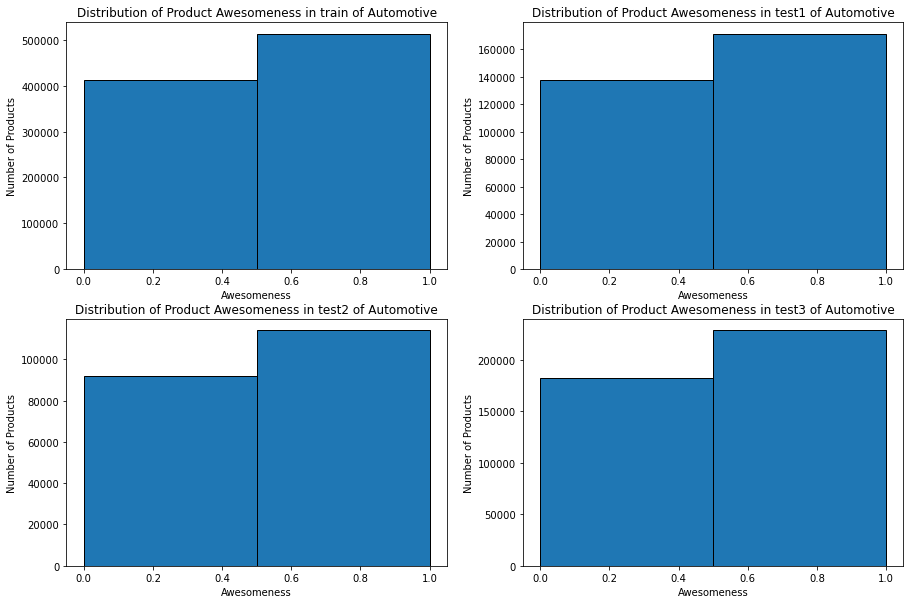

In [93]:
plot_awssomeness(train_data, test_data_1, test_data_2, test_data_3, "Automotive")